<a href="https://colab.research.google.com/github/pvihung/Spotify_Analysis/blob/main/SpotifyAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

file_path = 'sample_data/Spotify_Youtube.csv'
df = pd.read_csv(file_path,)
df.info()

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20594 entries, 0 to 20593
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20594 non-null  object 
 1   Track             20594 non-null  object 
 2   Album             20594 non-null  object 
 3   Album_type        20594 non-null  object 
 4   Danceability      20594 non-null  float64
 5   Energy            20594 non-null  float64
 6   Loudness          20594 non-null  float64
 7   Speechiness       20594 non-null  float64
 8   Acousticness      20594 non-null  float64
 9   Instrumentalness  20594 non-null  float64
 10  Liveness          20594 non-null  float64
 11  Valence           20594 non-null  float64
 12  Tempo             20594 non-null  float64
 13  Duration_min      20594 non-null  float64
 14  Title             20594 non-null  object 
 15  Channel           20594 non-null  object 
 16  Views             20594 non-null  float6

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,...,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,1.150082,Spotify
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,...,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08,15.183585,Spotify
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,...,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07,7.956897,Spotify
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,...,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08,11.546875,Spotify
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,...,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08,9.942693,Youtube
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20589,SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,0.582,0.926,-6.344,0.0328,0.448000,0.000000,...,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,True,True,9.227144e+06,11.036949,Spotify
20590,SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,0.531,0.936,-1.786,0.1370,0.028000,0.000000,...,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,True,True,1.089818e+07,10.140845,Spotify
20591,SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,0.443,0.830,-4.679,0.0647,0.024300,0.000000,...,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,True,True,6.226110e+06,5.389610,Spotify
20592,SICK LEGEND,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,0.417,0.767,-4.004,0.4190,0.356000,0.018400,...,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,True,True,6.873961e+06,7.101852,Spotify


In [2]:
#df.drop(columns=['Unnamed: 0','Url_spotify','Uri','Url_youtube','Description'], inplace=True)

In [3]:
df.Licensed.unique()
df.official_video.value_counts()
df.Stream.value_counts(ascending=True)


Stream
1.040235e+09      1
1.136698e+08      1
2.395772e+08      1
1.555379e+08      1
1.292629e+08      1
               ... 
9.999321e+06      9
5.539981e+07      9
8.946632e+07     19
1.697700e+08     24
0.000000e+00    576
Name: count, Length: 18339, dtype: int64

#1. Do high-tempo songs garner more streams?

In [4]:
df.Tempo.value_counts()

Tempo
77.986     24
106.002    19
0.000      19
120.031    12
119.982    11
           ..
82.525      1
82.499      1
89.901      1
82.879      1
155.378     1
Name: count, Length: 14954, dtype: int64

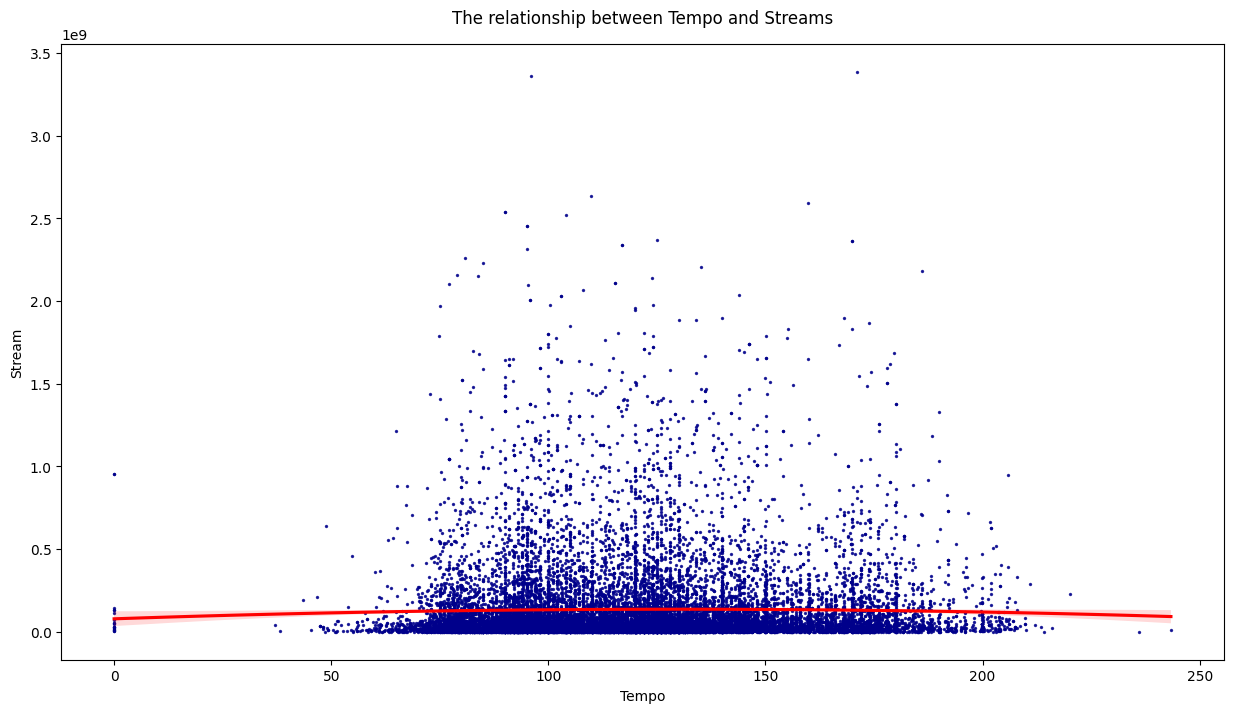

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

question_1 = sns.regplot(
    data=df,
    x='Tempo',
    y='Stream',
    scatter_kws={'s':2,'color':'darkblue'},
    order=2,
    line_kws={'color':'red'}
)
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.title('The relationship between Tempo and Streams', y=1.02)
plt.xlabel('Tempo')
plt.ylabel('Stream')
plt.show()

# We can say that Tempo is not a factor to determine a song will more likely to get a song or not


#2. Do songs with longer or shorter titles have more streams?


In [6]:
df.Title.value_counts()
title_length=df.Title.str.len()
title_length.mean()
df['Title_length']=title_length
df.Title_length.value_counts()

Title_length
46     482
1      469
47     468
44     466
41     465
      ... 
188      4
3        4
176      1
116      1
101      1
Name: count, Length: 103, dtype: int64

Text(0, 0.5, 'Stream')

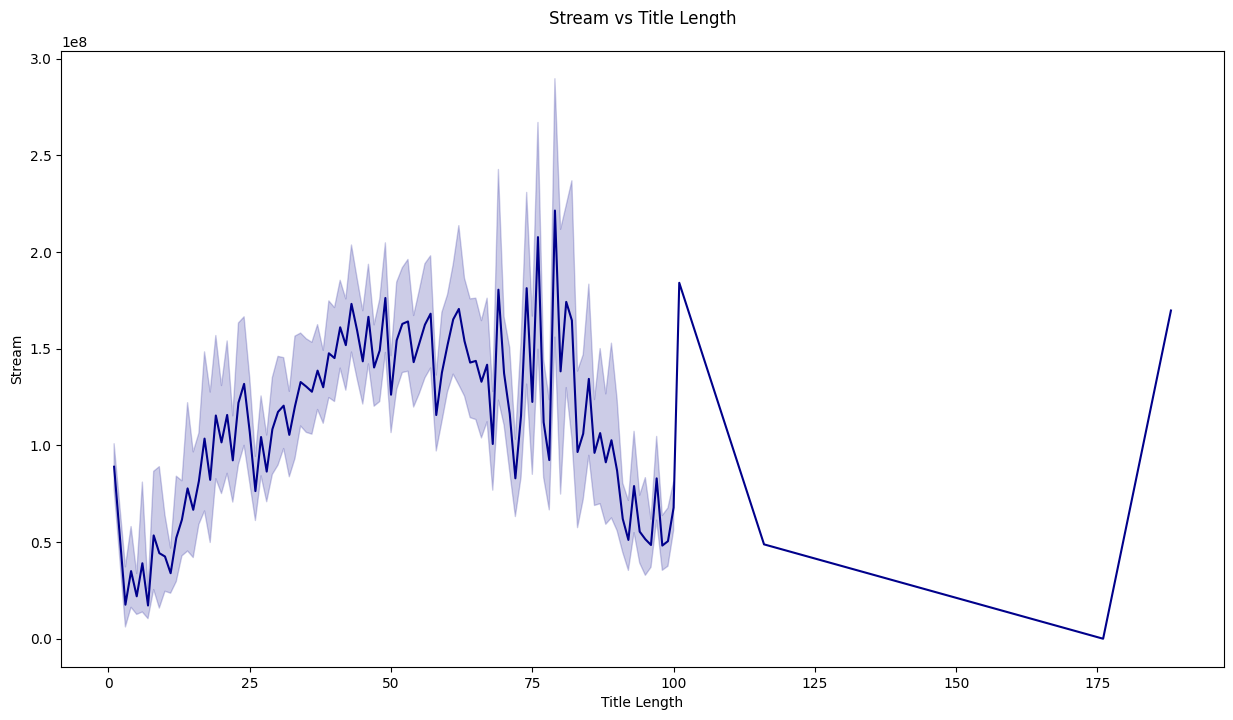

In [7]:
sns.lineplot(
    data = df,
    x = 'Title_length',
    y = 'Stream',
    color = 'darkblue'
)
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.title('Stream vs Title Length', y=1.03)
plt.xlabel('Title Length')
plt.ylabel('Stream')

In [12]:
# what traits make a loud vs quiet song widely streamed?
# quiet songs are one or more stddevs below the mean, opposite for loud songs

std_dev = df['Loudness'].std()
quiet_df = df[df['Loudness'] <= df['Loudness'].mean() - std_dev]
loud_df = df[df['Loudness'] >= df['Loudness'].mean() + std_dev]

correlation_matrix = quiet_df.select_dtypes(include='number').corr()
quiet_correlations = correlation_matrix['Stream']

correlation_matrix = loud_df.select_dtypes(include='number').corr()
loud_correlations = correlation_matrix['Stream']

print(quiet_correlations)
print(loud_correlations)

# weak correlations between any song trait and stream, aside from comments likes and views
# Comments, likes, and views already tell us a song is popular though, so they aren't useful
# quiet songs correlate loudness with streams, while loud songs have a negative correlation between loudness and streams
# suggests that moderate values in the dataset may maximize streams

Danceability        0.094824
Energy              0.051469
Loudness            0.157530
Speechiness        -0.092914
Acousticness       -0.096420
Instrumentalness   -0.162610
Liveness           -0.039610
Valence             0.063149
Tempo               0.028379
Duration_min        0.019094
Views               0.343118
Likes               0.451655
Comments            0.425853
Stream              1.000000
EnergyLiveness      0.104774
Title_length       -0.033883
Name: Stream, dtype: float64
Danceability        0.046480
Energy             -0.105700
Loudness           -0.114038
Speechiness        -0.018842
Acousticness       -0.065360
Instrumentalness   -0.035868
Liveness           -0.072627
Valence            -0.030596
Tempo              -0.064597
Duration_min        0.008699
Views               0.621201
Likes               0.690111
Comments            0.270929
Stream              1.000000
EnergyLiveness      0.028314
Title_length        0.019390
Name: Stream, dtype: float64


In [16]:
#Which combinations of valence and tempo create the most streamed songs?
#Are songs with high valence and low tempo most popular, or is it another combination like low valence and high tempo?

def split_by_quartile(df, column_name):
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame.")

    quartiles = df[column_name].quantile([0.25, 0.5, 0.75])
    q1 = df[df[column_name] <= quartiles[0.25]]
    q2 = df[(df[column_name] > quartiles[0.25]) & (df[column_name] <= quartiles[0.5])]
    q3 = df[(df[column_name] > quartiles[0.5]) & (df[column_name] <= quartiles[0.75])]
    q4 = df[df[column_name] > quartiles[0.75]]

    return [q1, q2, q3, q4]

# split into quartiles of valence, within those quartiles, split into mini quartiles of tempo
valence_quartiles = split_by_quartile(df, "Valence")

for i, quartile_df in enumerate(valence_quartiles):
    tempo_quartiles = split_by_quartile(quartile_df, "Tempo")
    for j, tq in enumerate(tempo_quartiles):
        print(f"valence quartile {i + 1} tempo quartile {j + 1} median streams: {tq.Stream.median()}")

# valence quartile 2 and tempo quartile 4 is combination listed with the highest median streams

valence quartile 0 tempo quartile 0 median streams: 36710681.0
valence quartile 0 tempo quartile 1 median streams: 48546790.0
valence quartile 0 tempo quartile 2 median streams: 48174242.0
valence quartile 0 tempo quartile 3 median streams: 51959037.0
valence quartile 1 tempo quartile 0 median streams: 48128033.0
valence quartile 1 tempo quartile 1 median streams: 49708785.0
valence quartile 1 tempo quartile 2 median streams: 53434721.0
valence quartile 1 tempo quartile 3 median streams: 59209384.0
valence quartile 2 tempo quartile 0 median streams: 44010476.0
valence quartile 2 tempo quartile 1 median streams: 50704522.0
valence quartile 2 tempo quartile 2 median streams: 50380292.0
valence quartile 2 tempo quartile 3 median streams: 48776065.0
valence quartile 3 tempo quartile 0 median streams: 42786642.0
valence quartile 3 tempo quartile 1 median streams: 48323336.0
valence quartile 3 tempo quartile 2 median streams: 46013190.0
valence quartile 3 tempo quartile 3 median streams: 420